# M08 T01

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import RobustScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score, silhouette_samples

### - Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

In [13]:
df=pd.read_csv("Publicacions Facebook Thailandia.csv")
df.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [15]:
df['status_id'].value_counts()

status_id
819700534875473_957599447752247      2
819700534875473_972433889602136      2
819700534875473_981835315328660      2
819700534875473_980941638751361      2
819700534875473_978746665637525      2
                                    ..
246675545449582_264078163709320      1
246675545449582_264081010375702      1
246675545449582_264089710374832      1
246675545449582_264092513707885      1
1050855161656896_1050858841656528    1
Name: count, Length: 6997, dtype: int64

Vemos que para varios identificadores de status hay varios registros, mostremos varios para ver si se trata de duplicados.


In [16]:
df[df['status_id']=='819700534875473_957599447752247']

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
6213,819700534875473_957599447752247,photo,3/24/2018 23:51,157,16,3,145,1,11,0,0,0,NaN,NaN,NaN,NaN
6264,819700534875473_957599447752247,photo,3/24/2018 23:51,157,16,3,145,1,11,0,0,0,NaN,NaN,NaN,NaN


In [17]:
df[df['status_id']=='819700534875473_972433889602136']

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
6194,819700534875473_972433889602136,photo,4/20/2018 3:16,1271,94,9,1249,11,8,2,1,0,NaN,NaN,NaN,NaN
6245,819700534875473_972433889602136,photo,4/20/2018 3:16,1271,94,9,1249,11,8,2,1,0,NaN,NaN,NaN,NaN


Podemos ver que realmente se trata de registros duplicados con el mismo contenido. Vamos a eliminarlos.

In [18]:
df.duplicated().sum()

51

In [19]:
df=df.drop_duplicates(subset=['status_id'])

In [20]:
df['status_id'].duplicated().sum()

0

In [21]:
df['status_id'].value_counts()

status_id
246675545449582_1649696485147474     1
725980084255106_831056807080766      1
725980084255106_821310368055410      1
725980084255106_821715704681543      1
725980084255106_822109934642120      1
                                    ..
246675545449582_264081010375702      1
246675545449582_264089710374832      1
246675545449582_264092513707885      1
246675545449582_264166627033807      1
1050855161656896_1050858841656528    1
Name: count, Length: 6997, dtype: int64

Consultaremos los NaN

In [22]:
df.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             6997
Column2             6997
Column3             6997
Column4             6997
dtype: int64

Ahora podemos quitar las columnas 'status_id' porque no nos aporta valor para análisis o predicción y 'Column1' 'Column2', 'Column3', 'Column4' porque tienen todos los registros vacíos.

In [23]:
df=df.drop(['status_id', 'Column1', 'Column2', 'Column3', 'Column4'], axis=1)

Transformaremos la columna categórica 'status_type' en columnas dummies

In [24]:
df['status_type'].value_counts()

status_type
photo     4242
video     2333
status     359
link        63
Name: count, dtype: int64

In [25]:
df=pd.get_dummies(df, columns=['status_type'], drop_first=True)
df.head()

,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video
0,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,False,False,True
1,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,True,False,False
2,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,False,False,True
3,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,True,False,False
4,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,True,False,False


La variable 'status_published' aunque podría ser útil para análisis, no nos resulta útil para entrenar el modelo, así que la eliminamos

In [26]:
df=df.drop('status_published', axis=1)
df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,False,False,True
1,150,0,0,150,0,0,0,0,0,True,False,False
2,227,236,57,204,21,1,1,0,0,False,False,True
3,111,0,0,111,0,0,0,0,0,True,False,False
4,213,0,0,204,9,0,0,0,0,True,False,False


In [27]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000
mean,224.951979,225.613977,40.269973,209.899814,12.755181,1.253251,0.698156,0.232671,0.110190
std,452.930082,892.863091,132.064065,439.595761,40.112024,8.726772,3.971462,1.481312,0.688678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216.000000,22.000000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


Podemos ver que las medias de las diferentes variables son muy diferentes en escala, necesitaremos hacer una estandarización antes de aplicar los modelos, ya que sino los modelos darían más importancia a las variables de mayor escala y no queremos que esto suceda. Para saber qué escalado aplicar miraremos cuales de ellas tienen distribución gausiana y de las que no cuales tienen outliers y cuales no.

In [28]:
def gaussian_cols (data):
    lista=[]
    for col in data:
        stat, p = shapiro(data[col])
        if p > 0.05:
            lista.append(col)
    return lista

In [29]:
cols_gausianas=gaussian_cols(df)
print("Les columnes que probablement tenen distribució gausiana son:", cols_gausianas)

Les columnes que probablement tenen distribució gausiana son: []


c:\Users\mabi1\anaconda3\envs\con-01\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Ninguna columna tiene distribución gausiana, así que queda descartado usar StandardScaler. Vamos a ver los outliers para saber qué estandarizado aplicar a cada columna.

<Axes: >

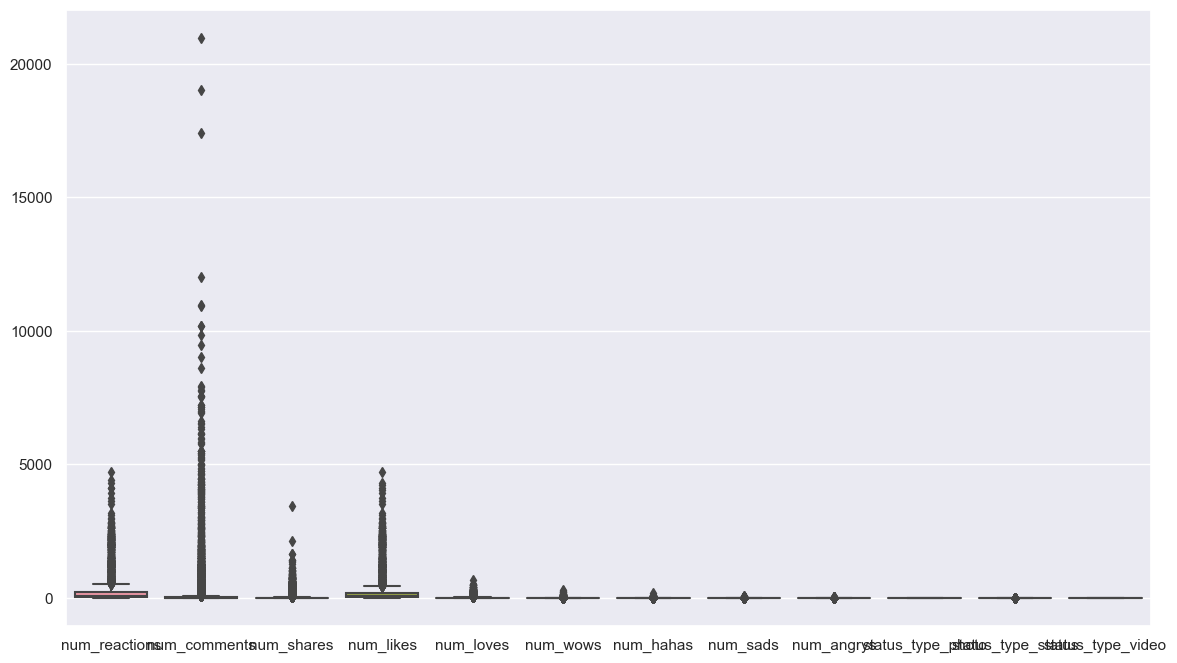

In [30]:
sns.set(rc={'figure.figsize':(14,8)})
sns.boxplot(df)

Como tenemos variables de diferentes escalas vamos a visualizarlo mejor separándolas.

<Axes: >

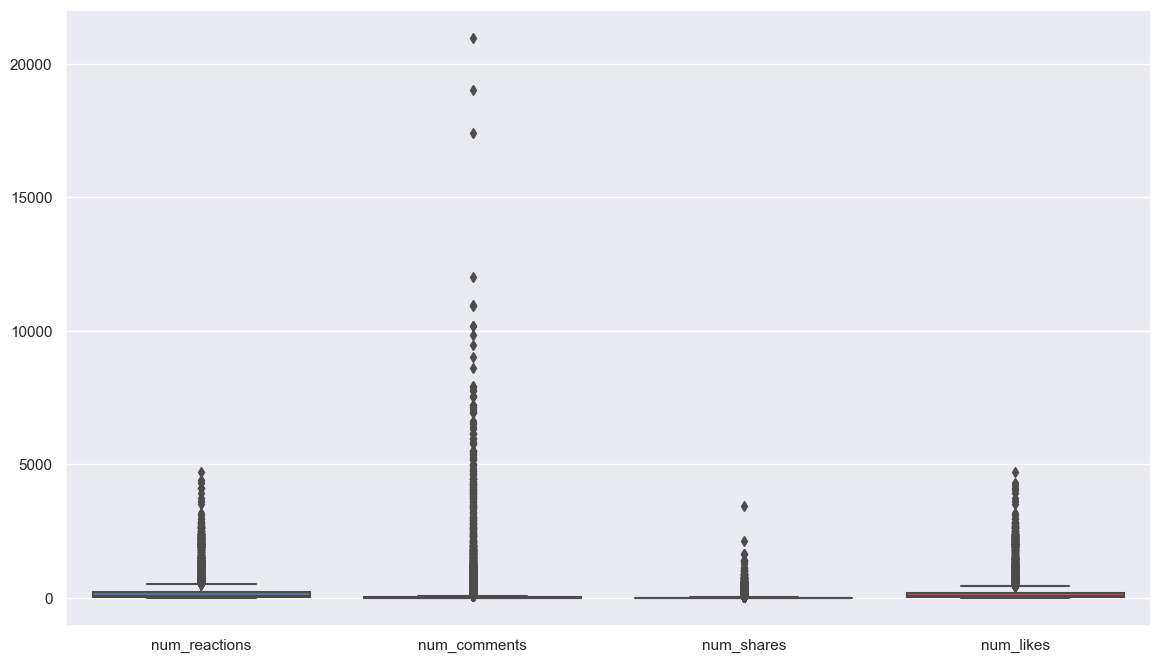

In [31]:
sns.boxplot(df.loc[:,['num_reactions', 'num_comments', 'num_shares', 'num_likes']])

Vemos que todas estan variables tienen outliers, comprovemos las demás

<Axes: >

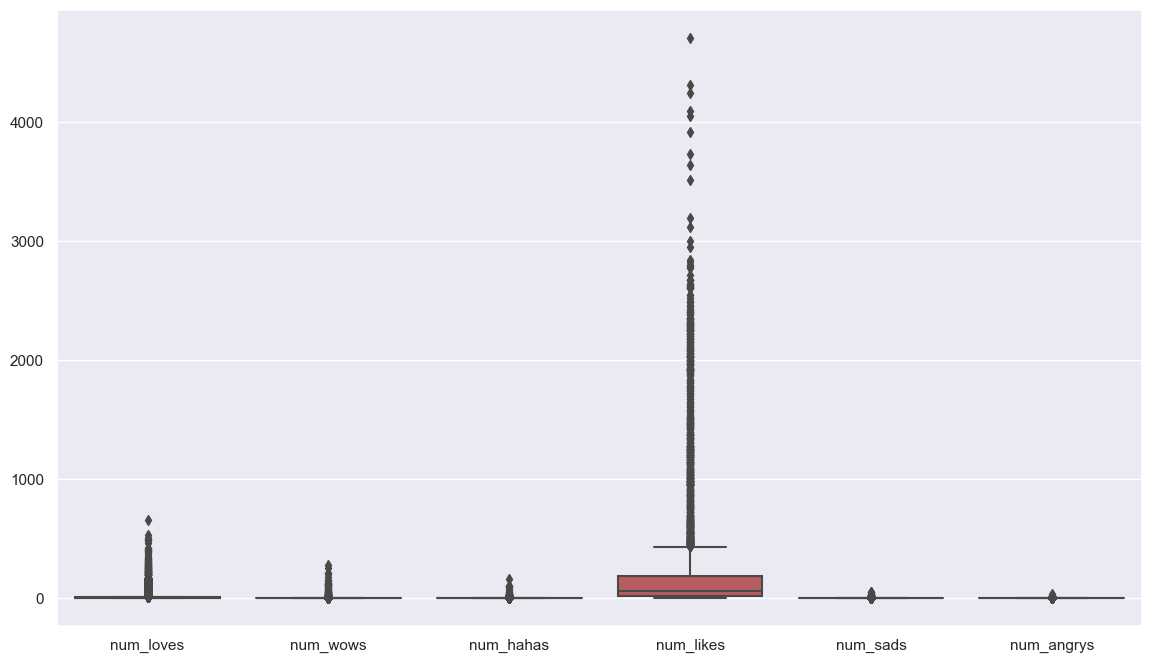

In [32]:
sns.boxplot(df.loc[:,['num_loves', 'num_wows', 'num_hahas', 'num_likes', 'num_sads', 'num_angrys']])

Estas variables también tienes outliers en mayor o menor medida. Así que les tocará a todas el Robust Escaler, excepto a las dummy que ya están listas.

In [33]:
numeric_cols=list(df.select_dtypes(include='int64').columns.values)
print(numeric_cols)

['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']


In [34]:
df_est=df.copy()
df_est[numeric_cols]=RobustScaler().fit_transform(df_est[numeric_cols])

In [35]:
df_est.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000
mean,0.838955,10.073363,10.067493,0.926666,4.251727,1.253251,0.698156,0.232671,0.110190
std,2.276031,40.584686,33.016016,2.664217,13.370675,8.726772,3.971462,1.481312,0.688678
min,-0.291457,-0.181818,0.000000,-0.345455,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.206030,-0.181818,0.000000,-0.242424,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.793970,0.818182,1.000000,0.757576,1.000000,0.000000,0.000000,0.000000,0.000000
max,23.376884,953.909091,856.000000,28.200000,219.000000,278.000000,157.000000,51.000000,31.000000


In [36]:
df_est.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6997 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_reactions       6997 non-null   float64
 1   num_comments        6997 non-null   float64
 2   num_shares          6997 non-null   float64
 3   num_likes           6997 non-null   float64
 4   num_loves           6997 non-null   float64
 5   num_wows            6997 non-null   float64
 6   num_hahas           6997 non-null   float64
 7   num_sads            6997 non-null   float64
 8   num_angrys          6997 non-null   float64
 9   status_type_photo   6997 non-null   bool   
 10  status_type_status  6997 non-null   bool   
 11  status_type_video   6997 non-null   bool   
dtypes: bool(3), float64(9)
memory usage: 567.1 KB


Aunque el número de columnas actuales (12) no requeriría de una reducción de dimensionalidad, se va a aplicar con fines educativos de poder poner esta técnica en práctica.

Empezaremos averiguando cuál sería el número de componentes ideal. El número actual de columnas numéricas es 9 (de 0 a 8).

Text(0, 0.5, 'cumulative explained variance')

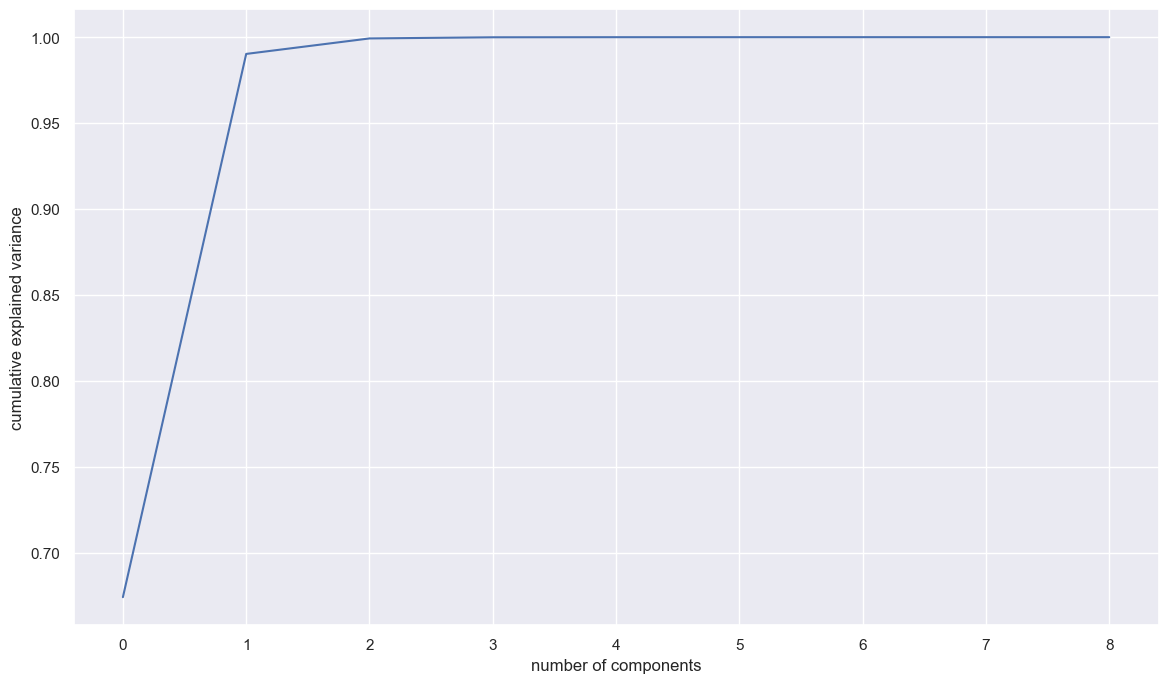

In [37]:
pca = PCA().fit(df[numeric_cols])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Según el gráfico 3 componentesv (0-2) explicarían el 100% de la varianza, así que ese es el número de componentes que vamos a usar.

In [38]:
pca = PCA(n_components=3)
pca.fit(df[numeric_cols])
data_pca=df[numeric_cols].copy()
df_bools=df.drop(numeric_cols, axis=1)
data_pca = pca.transform(data_pca)
print("original shape:   ", df.shape)
print("transformed shape:", data_pca.shape)

original shape:    (6997, 12)
transformed shape: (6997, 3)


Se podría realizar un MCA a las columnas booleanas, pero son solo 3 así que se opta por conservarlas.

Se vuelven a juntar los componentes resultantes de la pca con las columnas booleanas

In [39]:
df_pca=pd.DataFrame(data_pca)
type(df_pca)

pandas.core.frame.DataFrame

In [40]:
df_pca.reset_index(drop=True, inplace=True)
df_bools.reset_index(drop=True, inplace=True)
df_reduced=pd.concat([df_pca, df_bools], axis=1)


In [41]:
df_reduced.columns=df_reduced.columns.astype(str)
df_reduced.head()

,0,1,2,status_type_photo,status_type_status,status_type_video
0,370.680264,318.513435,199.885223,False,False,True
1,-242.153241,-54.029698,-18.163153,True,False,False
2,11.614129,-4.216771,18.023451,False,False,True
3,-251.910292,-108.281029,-16.307086,True,False,False
4,-227.171051,27.476559,-17.372309,True,False,False


Una vez preparados los datos vamos a aplicar el algoritmo k-means para hacer clusters.

In [42]:
X=df_reduced.values

Empezamos probándolo con un número de clusters aleatorio (en este caso 3), en el ejercicio 3 veremos cual es el número ideal de clusters a emplear.

In [43]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [44]:
print("El SSE más bajo es", kmeans.inertia_)
print("Las localizaciones de los centroides son:" , kmeans.cluster_centers_)
print("El número de iteraciones hasta alcanzar la convergencia fue", kmeans.n_iter_)

El SSE más bajo es 2685495234.860482
Las localizaciones de los centroides son: [[-1.43432139e+02 -1.34064580e+02  1.76841941e-01  6.31084677e-01
   4.36688058e-02  3.17577086e-01]
 [ 5.08933435e+03 -6.23416100e+02 -7.85476502e+01  7.35294118e-03
   0.00000000e+00  9.92647059e-01]
 [ 4.75081487e+02  1.99432880e+03  2.02386383e+01  4.42796610e-01
   1.69491525e-01  3.58050847e-01]]
El número de iteraciones hasta alcanzar la convergencia fue 12


In [45]:
label=kmeans.predict(X)

Vamos a visualizar el resultado

<Axes: >

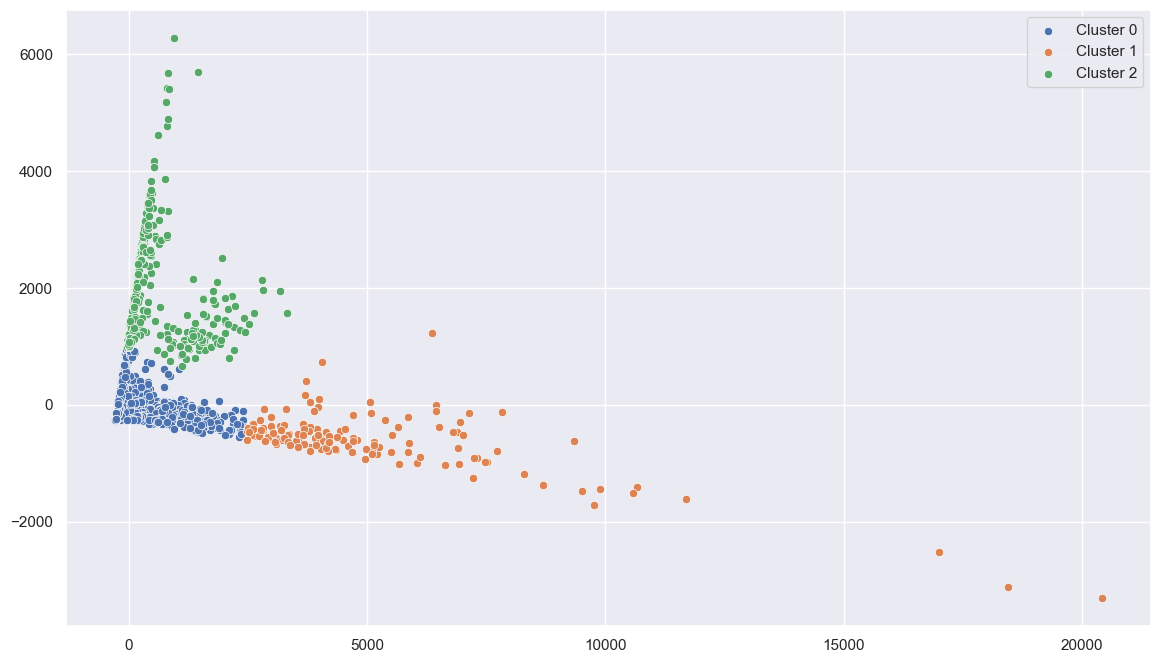

In [46]:
sns.scatterplot(x=X[label == 0, 0], y=X[label == 0, 1], label='Cluster 0')
sns.scatterplot(x=X[label == 1, 0], y=X[label == 1, 1], label='Cluster 1')
sns.scatterplot(x=X[label == 2, 0], y=X[label == 2, 1], label='Cluster 2')


Aquí vemos los clusters que ha generado, algunos más concentrados y otros más dispersos.

### - Exercici 2
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

Primero mostraremos el dendograma para ver como se realizan las agrupaciones por distancia.

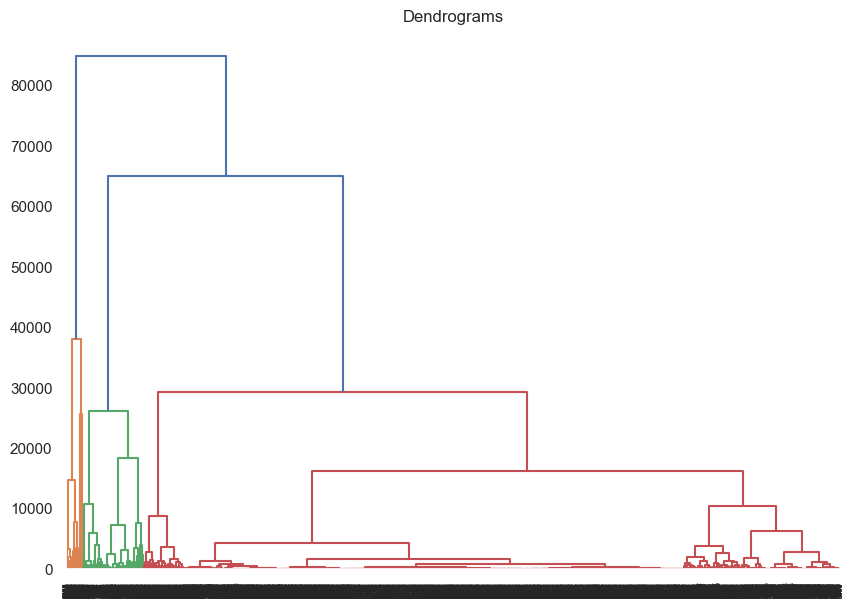

In [47]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_reduced, method='ward'))

Si trazáramos una linea horizontal que cortase la línea más larga del dendograma (la azul más a la izquierda en este caso) por la mitad, el número de líneas verticales que corta (en este caso parece que 3 pero está muy cercano a ser 2) nos daría el número de clusters con el que empezar.

In [54]:
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')  

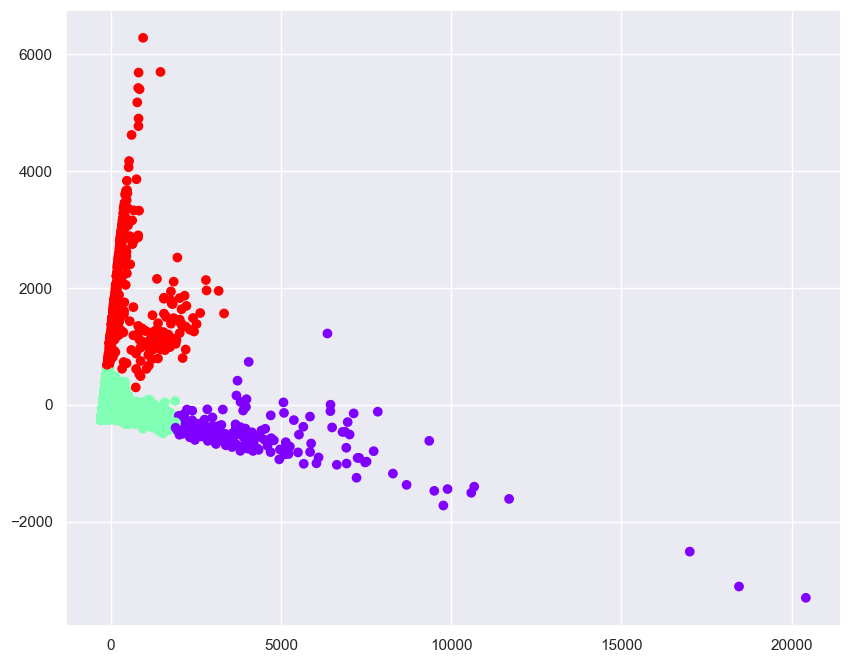

In [49]:
plt.figure(figsize =(10, 8))
plt.scatter(df_reduced['0'], df_reduced['1'], 
           c = cluster.fit_predict(X), cmap ='rainbow')
plt.show()

Vemos que la distribución de clusters que ha hecho es muy similar a la que hizo Kmeans.

### - Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

El silhouette score nos vale para calcular si los clusters están bien formados. Va de valor -1 a 1 donde valores cercanos a 1 nos indicarían clusters bien cohesionados y separados entre sí. Valores cercanos a 0 nos indicarían que los clusters se solapan y el valor de cohesión y de separación son similares, lo cual no sería una situación deseada. Y valores cercanos a -1 nos indicarían una asignación incorrecta de los elementos a los clusters.

Empezaremos con el algoritmo K-means. Vamos a ver primero los resultados listados:

In [50]:
n_clusters=[2,3,4,5,6,7]
for n in n_clusters:
    clusterer = KMeans(n_clusters=n, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n, "the average silhouette_score is :", silhouette_avg)

For n_clusters = 2 the average silhouette_score is : 0.8212906728376528
For n_clusters = 3 the average silhouette_score is : 0.8130146003198349
For n_clusters = 4 the average silhouette_score is : 0.8151649418632978
For n_clusters = 5 the average silhouette_score is : 0.7872279431064199
For n_clusters = 6 the average silhouette_score is : 0.6604008575637079
For n_clusters = 7 the average silhouette_score is : 0.7638536406128036


Según el silhouette score obtenido el número ideal de clusters para nuestros datos sería 2, seguido de cerca por 4 o 3. 

Vamos ahora a realizar una visualización de las diferentes distribuciones según el número de cluster y sus silhouette scores.

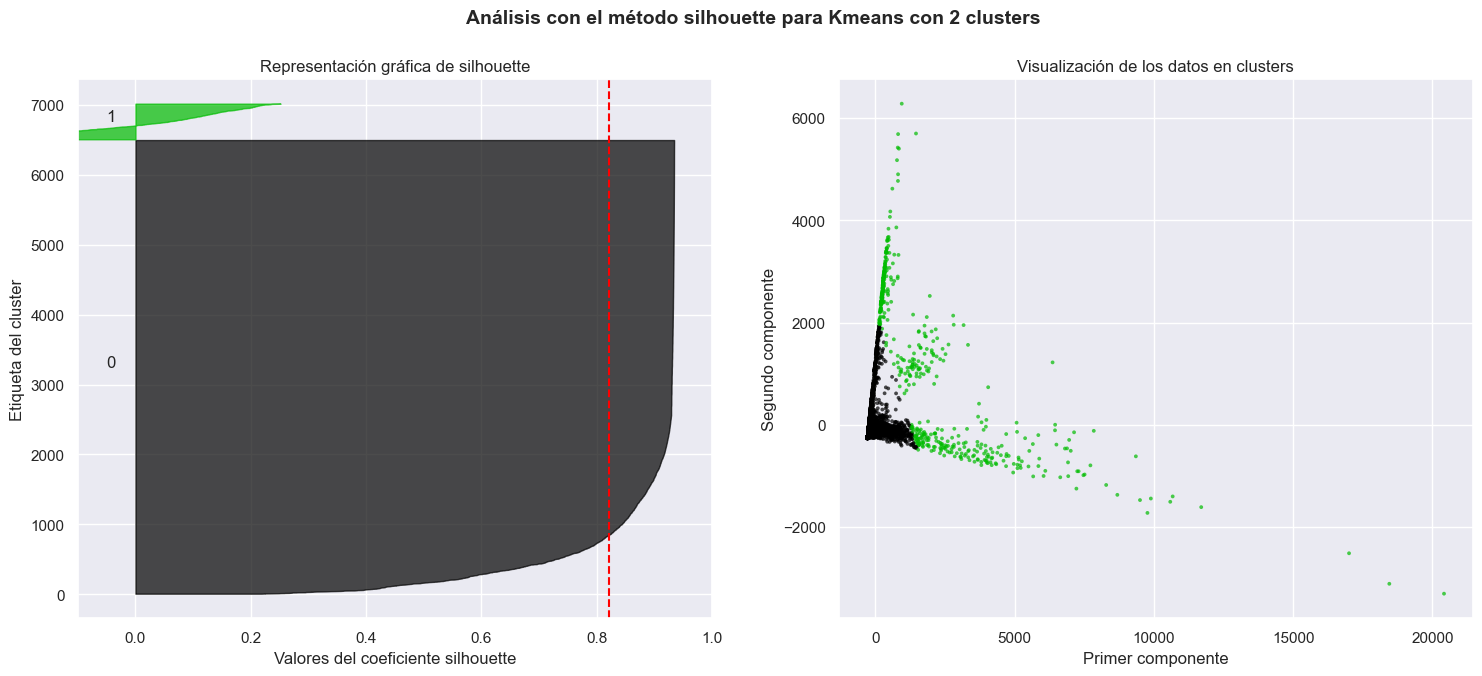

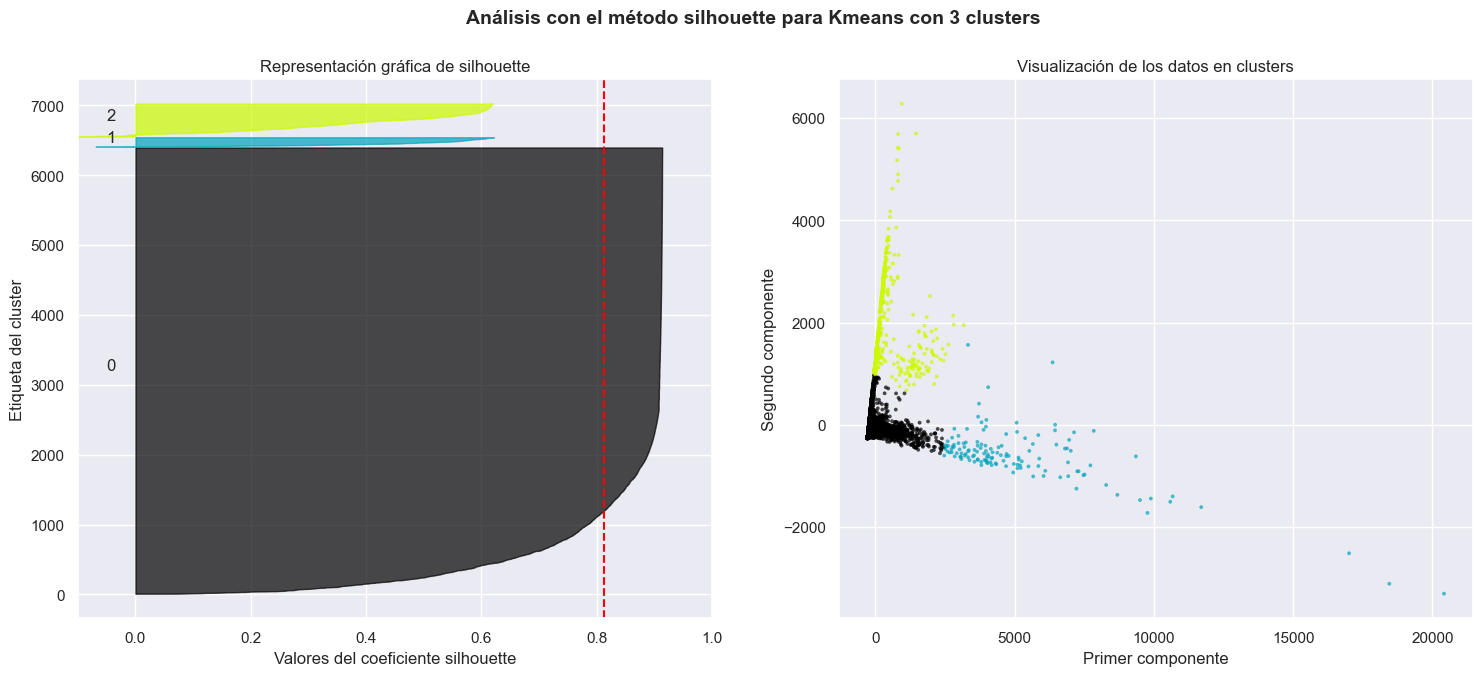

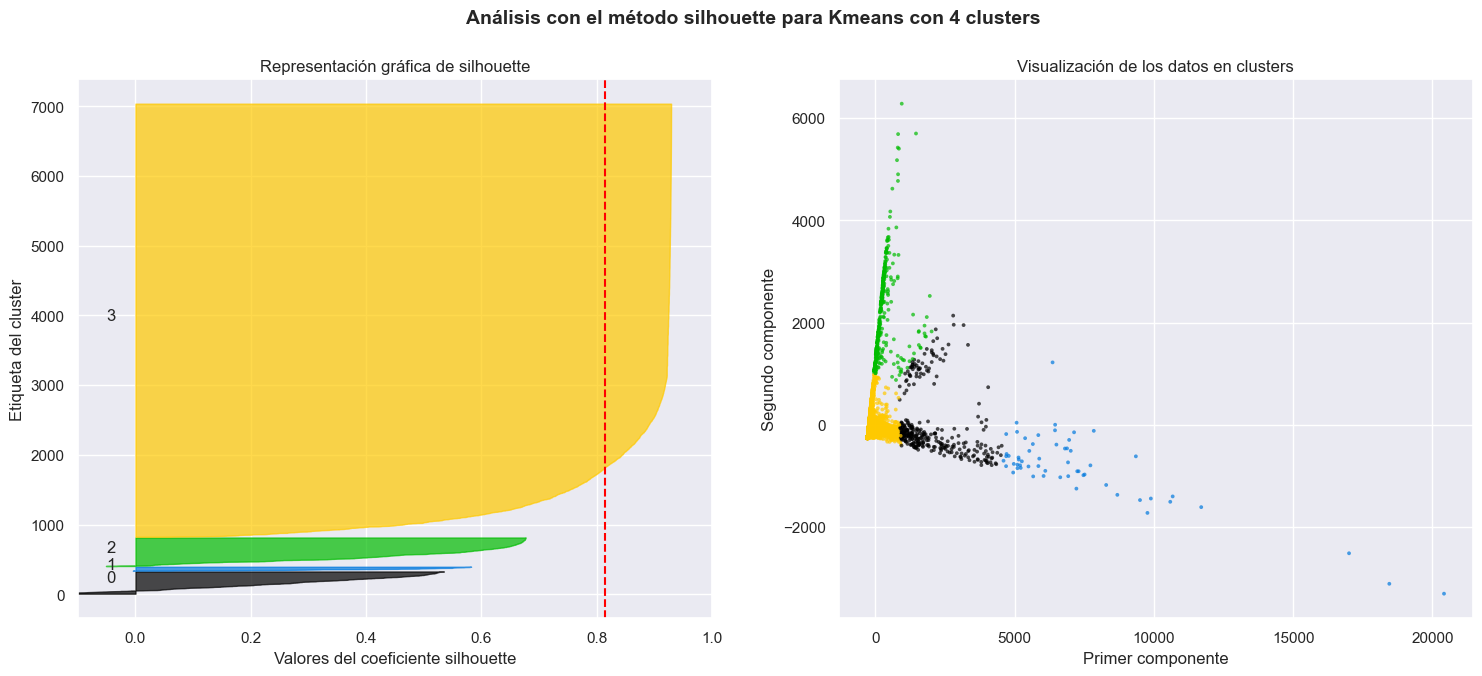

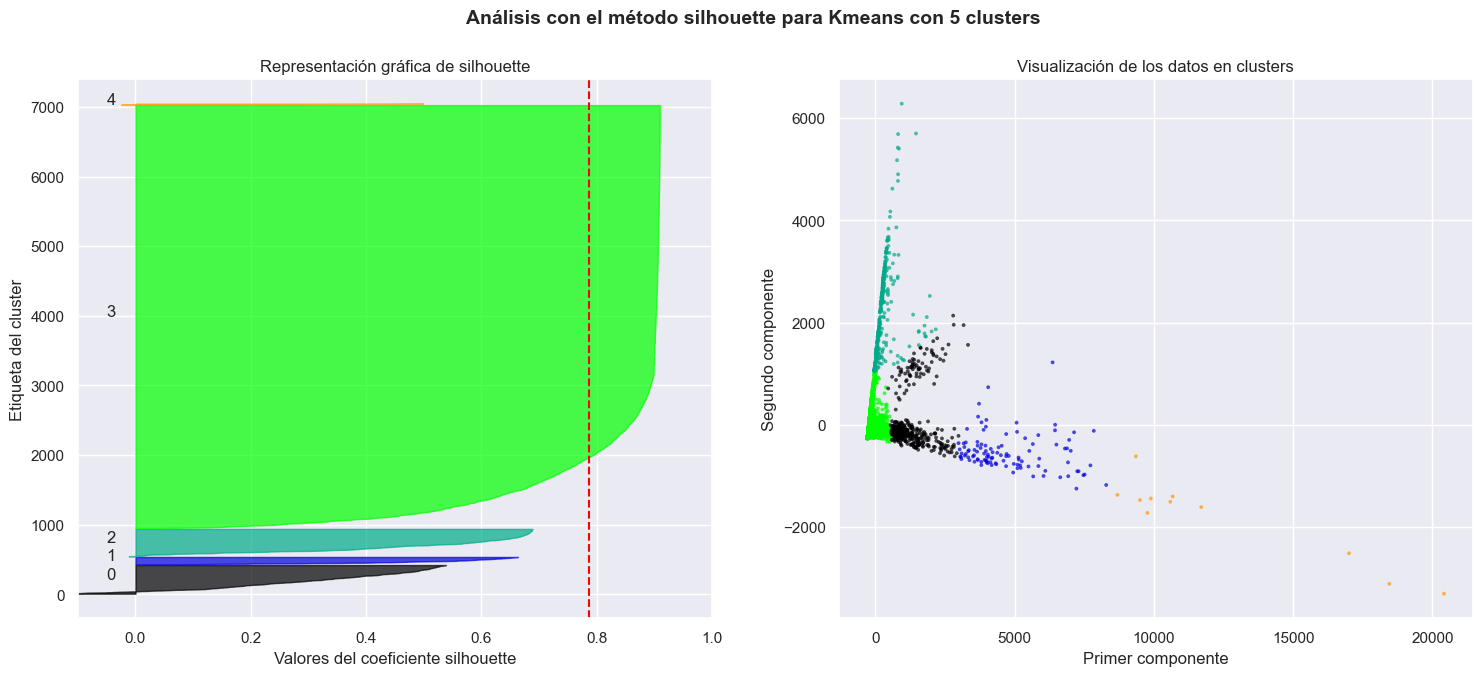

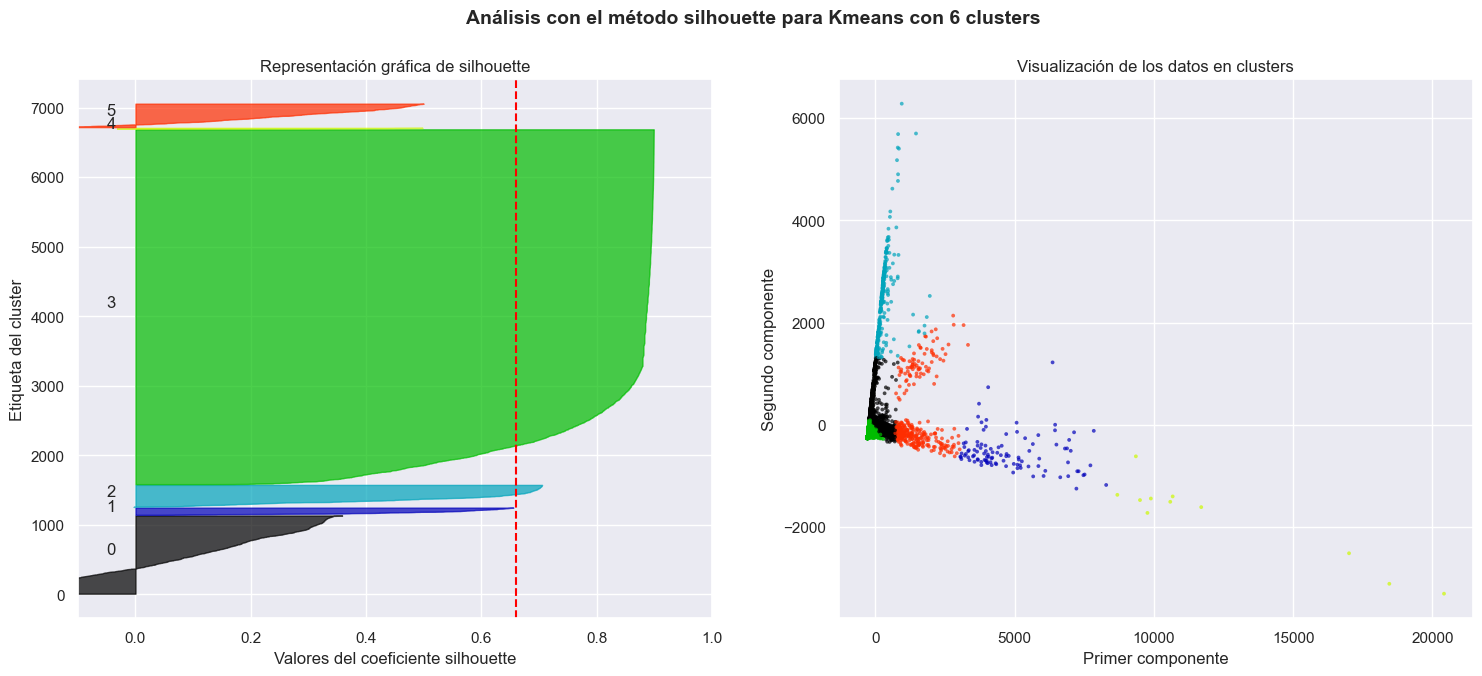

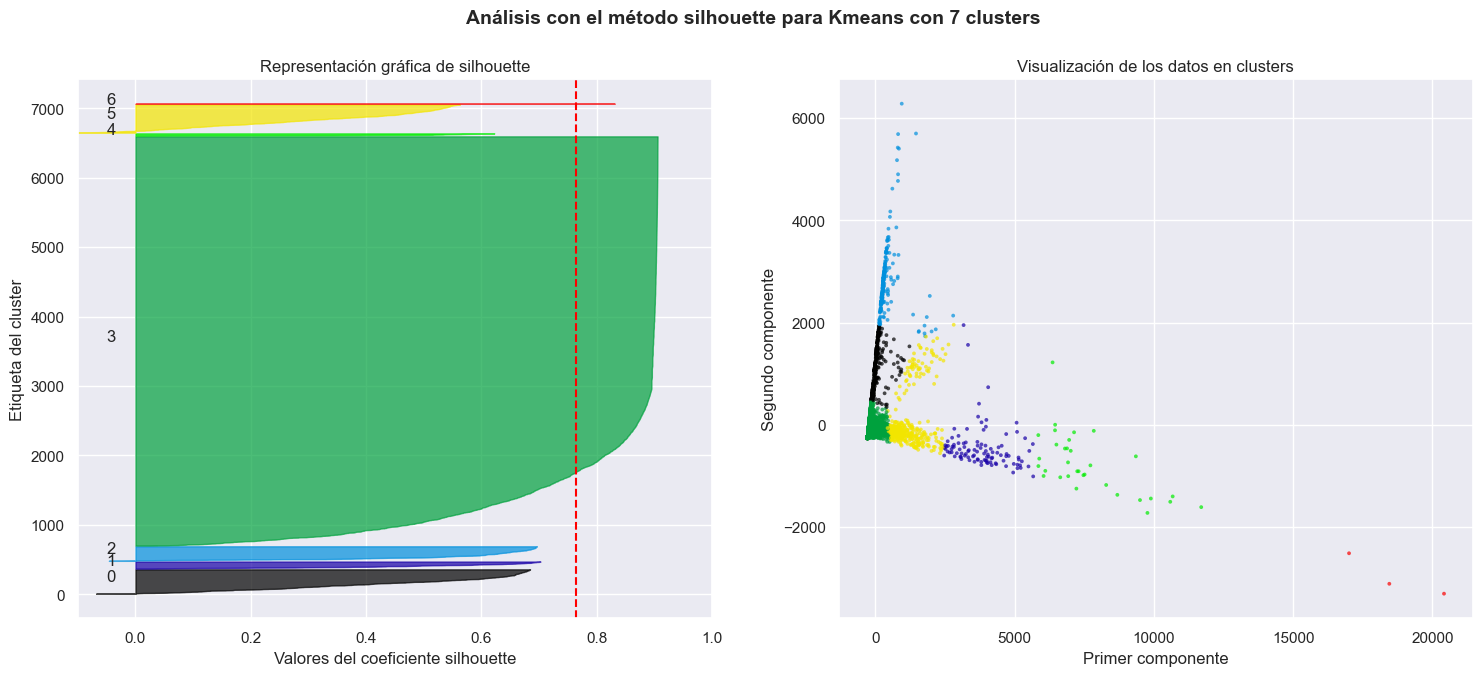

In [51]:
for n in n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    clusterer = KMeans(n_clusters=n, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax1.set_title("Representación gráfica de silhouette")
    ax1.set_xlabel("Valores del coeficiente silhouette")
    ax1.set_ylabel("Etiqueta del cluster")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n)
    ax2.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
    ax2.set_title("Visualización de los datos en clusters")
    ax2.set_xlabel("Primer componente")
    ax2.set_ylabel("Segundo componente")

    plt.suptitle(
        "Análisis con el método silhouette para Kmeans con %d clusters"
        % n,
        fontsize=14,
        fontweight="bold",
    )

plt.show()
        

En este gràfico podemos ver como las opciones de 2,3 o 4 clusters serían las mejores, y a partir de ahí los clusters se empiezan a solapar y los scores bajan. El número óptimo sería 2 clusters pero hay muy poca diferencia con 3 o 4, así que estos serían también opciones válidas.

Vamos a realizar el mismo proceso con el clustering jerárquico acumulativo.

In [52]:
for n in n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n, "the average silhouette_score is :", silhouette_avg)

For n_clusters = 2 the average silhouette_score is : 0.8650554154386979
For n_clusters = 3 the average silhouette_score is : 0.8032539483756986
For n_clusters = 4 the average silhouette_score is : 0.8046959653424697
For n_clusters = 5 the average silhouette_score is : 0.7456020260834014
For n_clusters = 6 the average silhouette_score is : 0.7532976061745974
For n_clusters = 7 the average silhouette_score is : 0.7537112055090918


Vemos como para el algoritmo jerárquico también la opción indicada es tener 2 clusters, esta vez con una diferencia superior a las opciones 3 o 4 que en K-means. La puntuación que obtienen los clústers a partir de 5 también se ve reducida en este algoritmo, de manera que la opción correcta queda más clara.

Vamos a mostrarlo gráficamente:

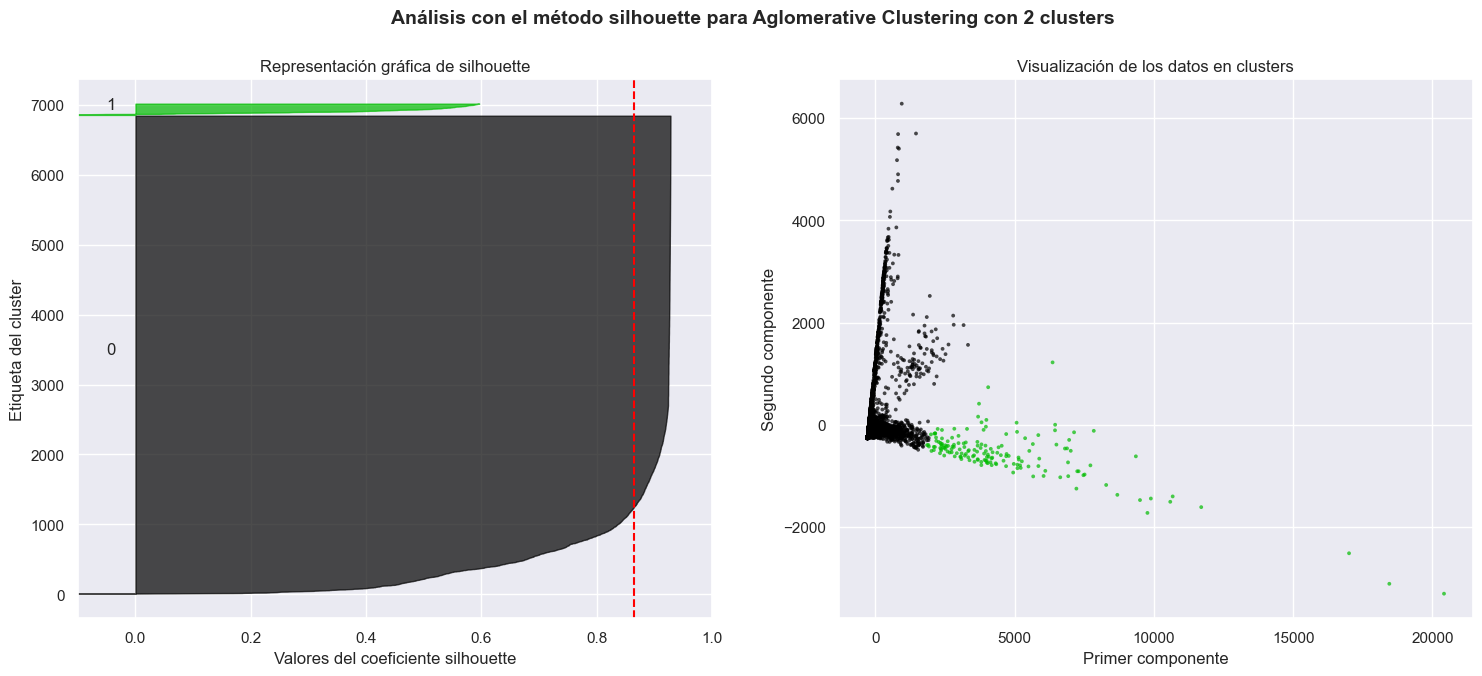

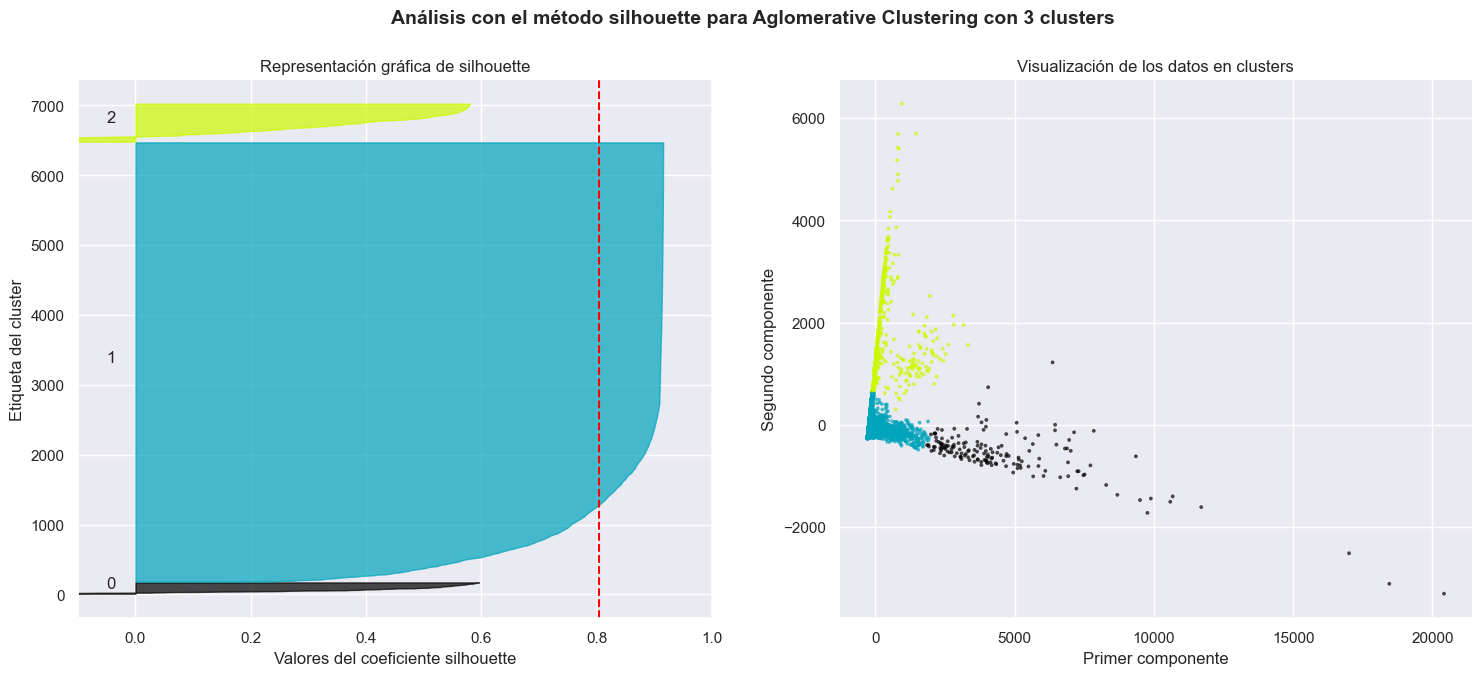

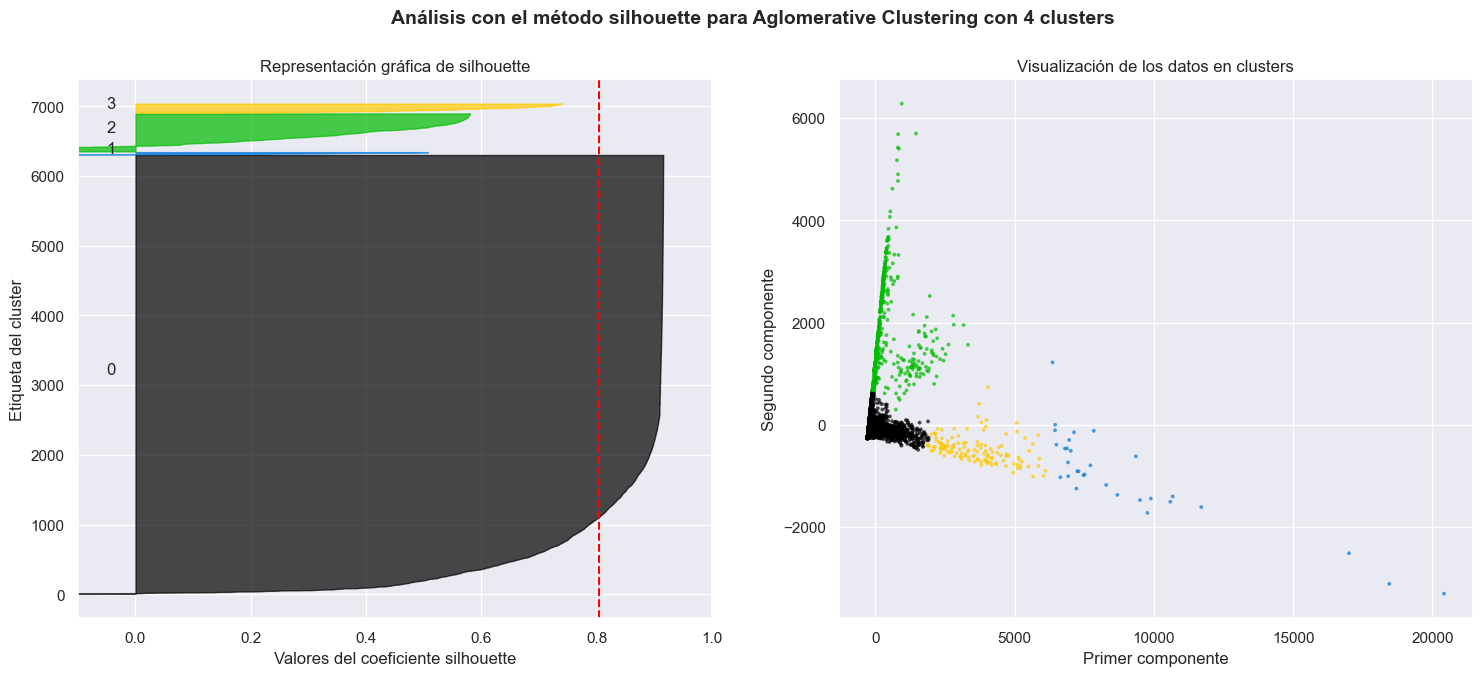

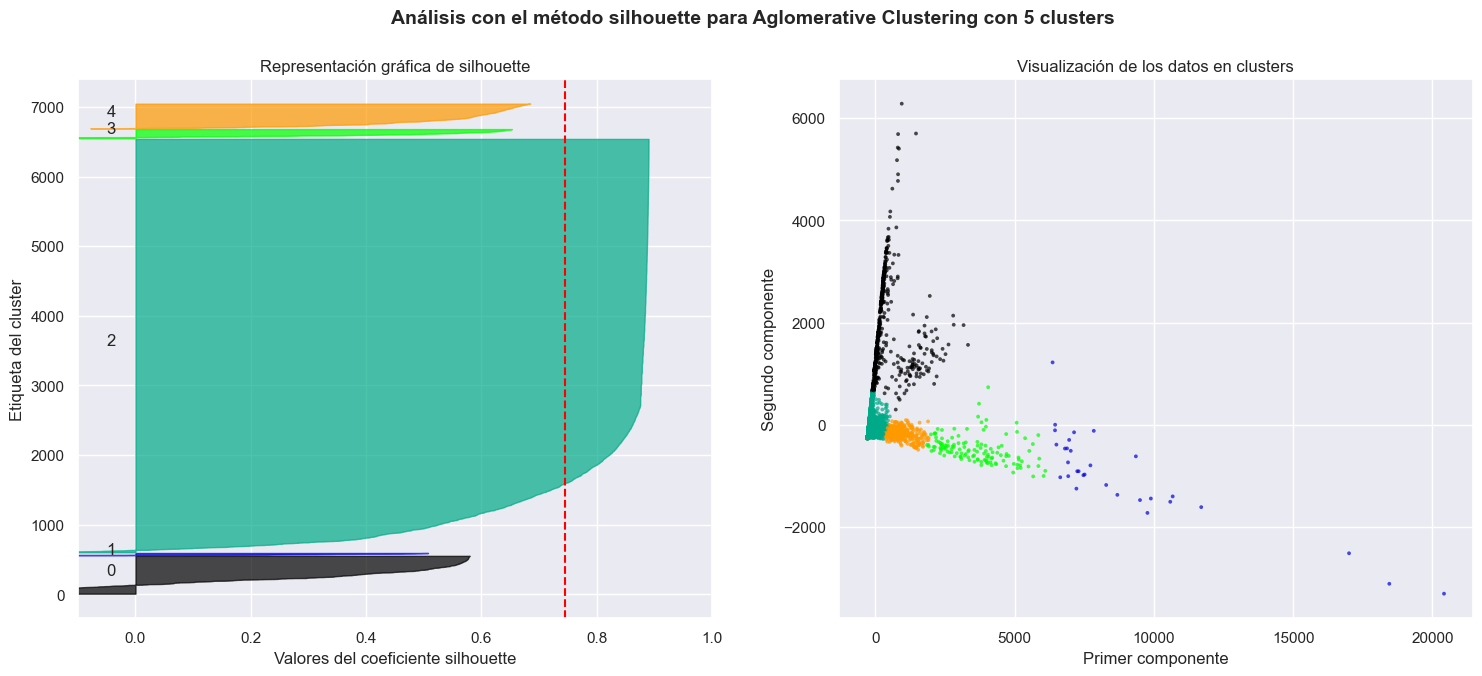

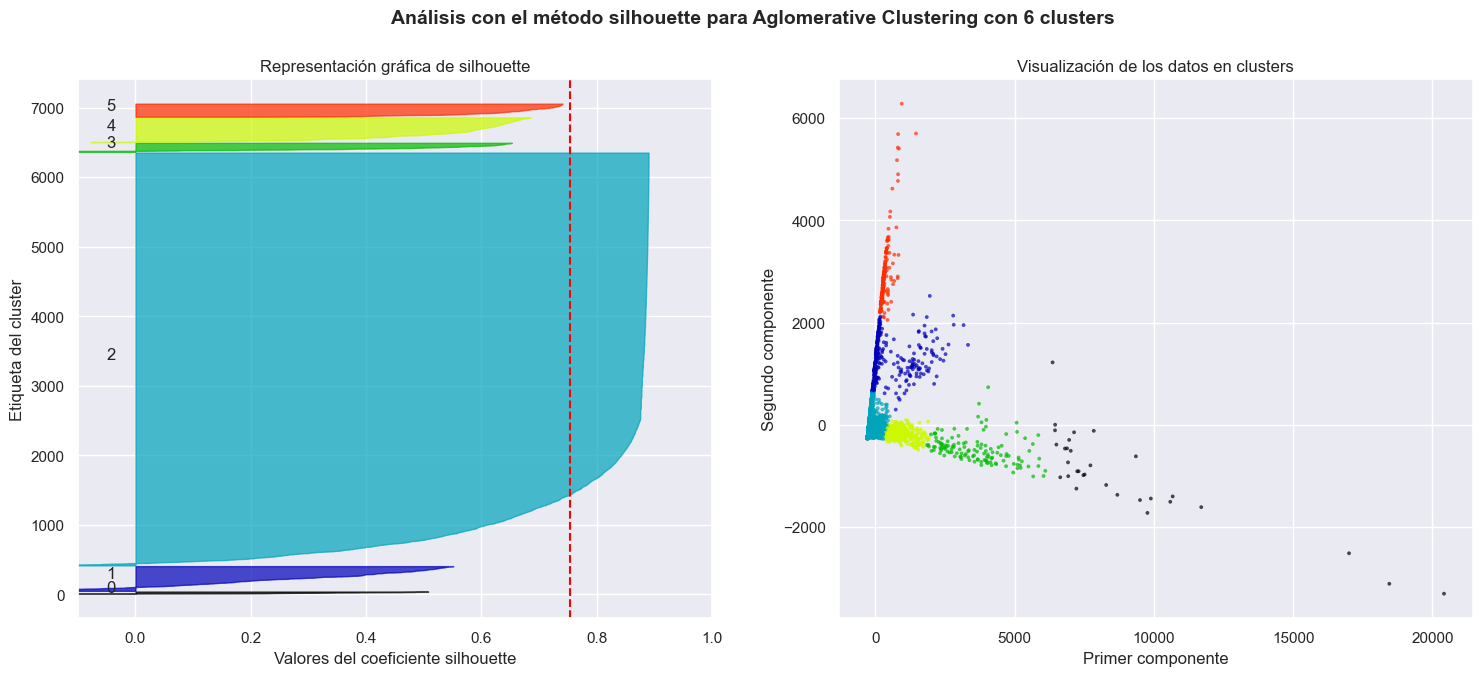

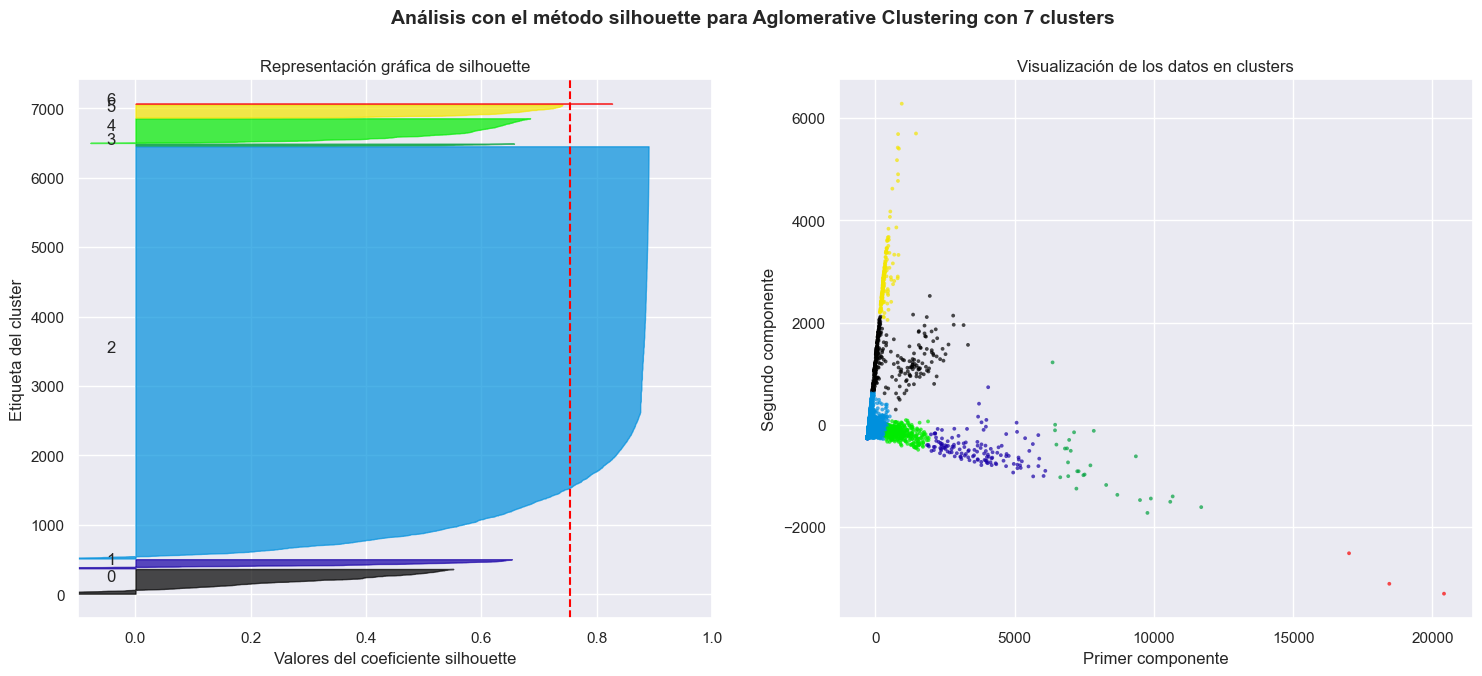

In [53]:
for n in n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    clusterer = AgglomerativeClustering(n_clusters=n)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax1.set_title("Representación gráfica de silhouette")
    ax1.set_xlabel("Valores del coeficiente silhouette")
    ax1.set_ylabel("Etiqueta del cluster")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n)
    ax2.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
        
    ax2.set_title("Visualización de los datos en clusters")
    ax2.set_xlabel("Primer componente")
    ax2.set_ylabel("Segundo componente")

    plt.suptitle(
        "Análisis con el método silhouette para Aglomerative Clustering con %d clusters"
        % n,
        fontsize=14,
        fontweight="bold",
    )

plt.show()
        

Aquí volvemos a ver de manera visual lo que ya nos decían los silhouette scores, el número óptimo de clusters sería 2 y a partir de ahí baja el rendimiento del clustering.